In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [2]:
dTrain = pd.read_csv('../datasets/train.csv')
dTest = pd.read_csv('../datasets/test.csv')

In [3]:
dTrain

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [4]:
dTest

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,6400,93.0,15.9,3.6,0.100,11.90,1.400,12.7,208.0,6.5,156.0
1,6401,180.0,34.0,200.0,1.900,8.20,1.300,300.0,1700.0,210.0,860.0
2,6402,95.0,44.0,35.0,0.081,3.30,1.100,28.0,390.0,22.0,240.0
3,6403,110.0,29.0,12.0,0.250,6.00,0.150,23.0,283.0,15.0,190.0
4,6404,179.0,59.0,51.7,0.160,45.00,4.100,64.0,976.0,170.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...
1596,7996,88.0,30.0,11.0,0.170,3.20,1.217,24.0,289.0,22.0,140.0
1597,7997,64.0,21.0,18.0,0.050,0.68,4.700,31.0,327.0,28.0,160.0
1598,7998,210.0,32.0,53.0,0.150,24.00,0.120,68.0,570.0,25.0,670.0
1599,7999,230.0,82.0,14.0,0.100,9.00,2.000,19.0,580.0,24.0,310.0


In [5]:
dTest.shape

(1601, 11)

In [6]:
dTrain.shape

(6400, 12)

In [7]:
dTrain.isna().sum()

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

In [8]:
dTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [9]:
dTrain.shape

(6400, 12)

In [10]:
dTrain.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


<Axes: >

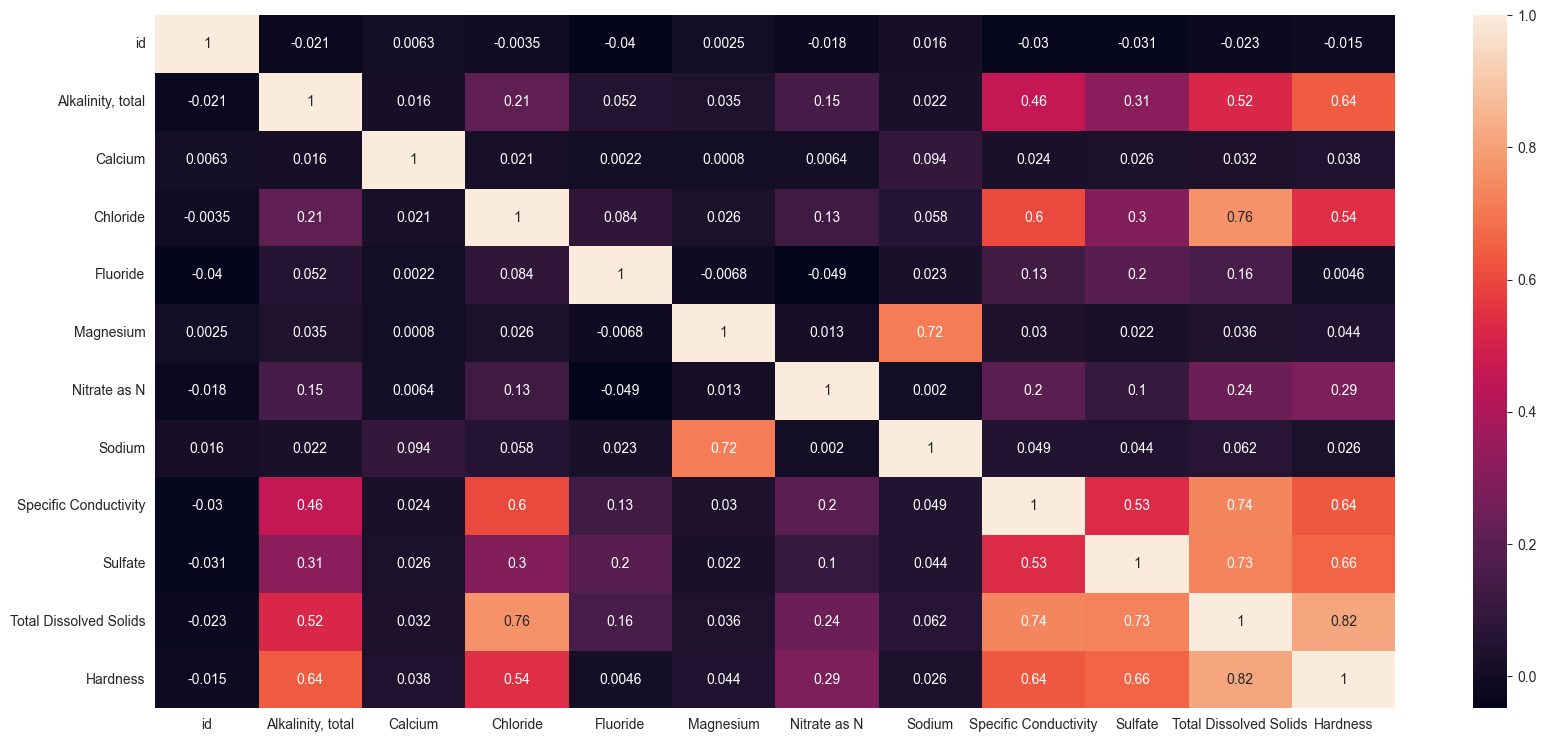

In [11]:
plt.figure(figsize=(20,9))
tcorr = dTrain.corr(method='pearson')
sns.heatmap(tcorr, annot=True) 

### Berapa hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaaan (alkalinity) di atas rata-rata?

In [13]:
sod_juma_per = dTrain['Sodium'].quantile(0.75)

mean_alka = dTrain['Alkalinity, total'].mean()

filter_data = dTrain[(dTrain['Sodium'] > sod_juma_per) & (dTrain['Alkalinity, total'] > mean_alka)]

mean_hardness = filter_data['Hardness'].mean()

print(f"Kesadahan air rata-rata yang kadar sodiumnya di atas persentil 75 dan memiliki tingkat kebasaaan (Alkalinity) di atas rata-rata: {mean_hardness.round(4)} mg/L")

Kesadahan air rata-rata yang kadar sodiumnya di atas persentil 75 dan memiliki tingkat kebasaaan (Alkalinity) di atas rata-rata: 383.0833 mg/L


### Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap sebagai outlier? Jelaskan!

In [14]:
alka_stats = dTrain['Alkalinity, total'].describe()
median = alka_stats['50%']
q1 = alka_stats['25%']
q3 = alka_stats['75%']
iqr = q3 - q1
nilai_min = alka_stats['min']
nilai_max = alka_stats['max']

In [15]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

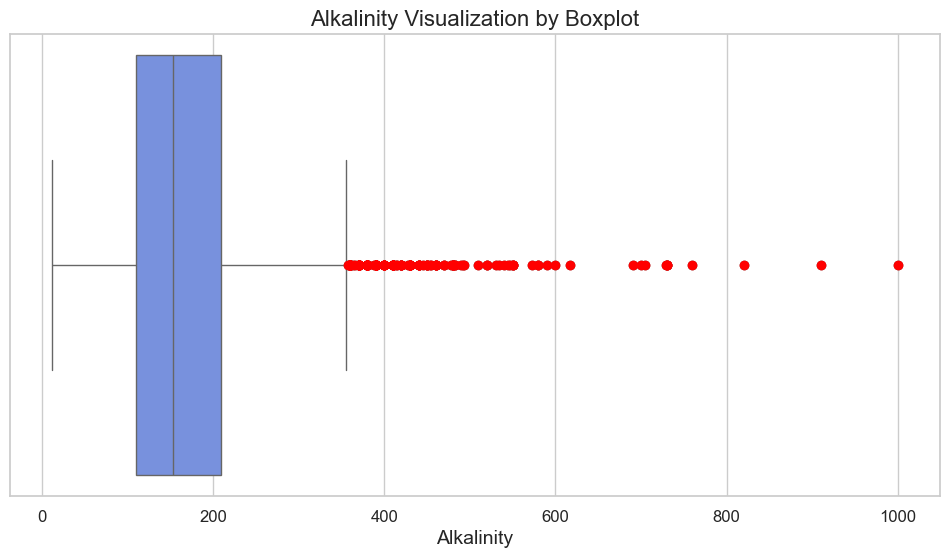

In [16]:
sns.set_theme(style="whitegrid")
custom_color = sns.color_palette("coolwarm")

plt.figure(figsize=(12,6))
boxplot = sns.boxplot(x='Alkalinity, total', data=dTrain, palette=custom_color)

boxplot.set_title('Alkalinity Visualization by Boxplot', fontsize=16)
boxplot.set_xlabel('Alkalinity', fontsize=14)
boxplot.tick_params(axis='both', which='major', labelsize=12)

outliers = dTrain[(dTrain['Alkalinity, total'] < lower_bound) | (dTrain['Alkalinity, total'] > upper_bound)]

for outlier in outliers['Alkalinity, total']:
    plt.scatter(outlier, 0, color='red', zorder=10)

plt.show()


In [17]:
print(f"Median: {median} mg/L")
print(f"Q1 (25th percentile): {q1} mg/L")
print(f"Q3 (75th percentile): {q3} mg/L")
print(f"IQR: {iqr} mg/L")
print(f"Lower bound (non-outliers): {lower_bound} mg/L")
print(f"Upper bound (non-outliers): {upper_bound} mg/L")
print(f"Minimum value (actual): {nilai_min} mg/L")
print(f"Maximum value (actual): {nilai_max} mg/L")

print("Outliers Alkalinity : ")
print(outliers['Alkalinity, total'])
print("Outliers Alkalinity total: ", outliers['Alkalinity, total'].value_counts().sum())

Median: 153.5 mg/L
Q1 (25th percentile): 110.0 mg/L
Q3 (75th percentile): 209.0 mg/L
IQR: 99.0 mg/L
Lower bound (non-outliers): -38.5 mg/L
Upper bound (non-outliers): 357.5 mg/L
Minimum value (actual): 12.0 mg/L
Maximum value (actual): 1000.0 mg/L
Outliers Alkalinity : 
34      400.0
36      360.0
39      617.0
48      360.0
54      370.0
        ...  
6193    410.0
6204    390.0
6206    390.0
6323    461.0
6363    450.0
Name: Alkalinity, total, Length: 174, dtype: float64
Outliers Alkalinity total:  174


In [12]:
col = ['Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity', 'Sulfate', 'Total Dissolved Solids', 'Hardness']

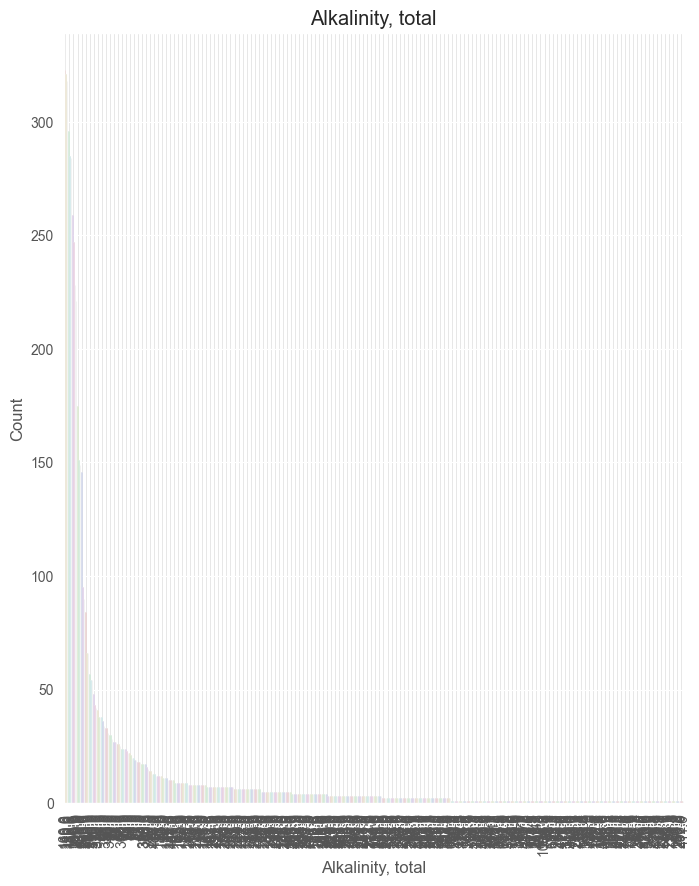

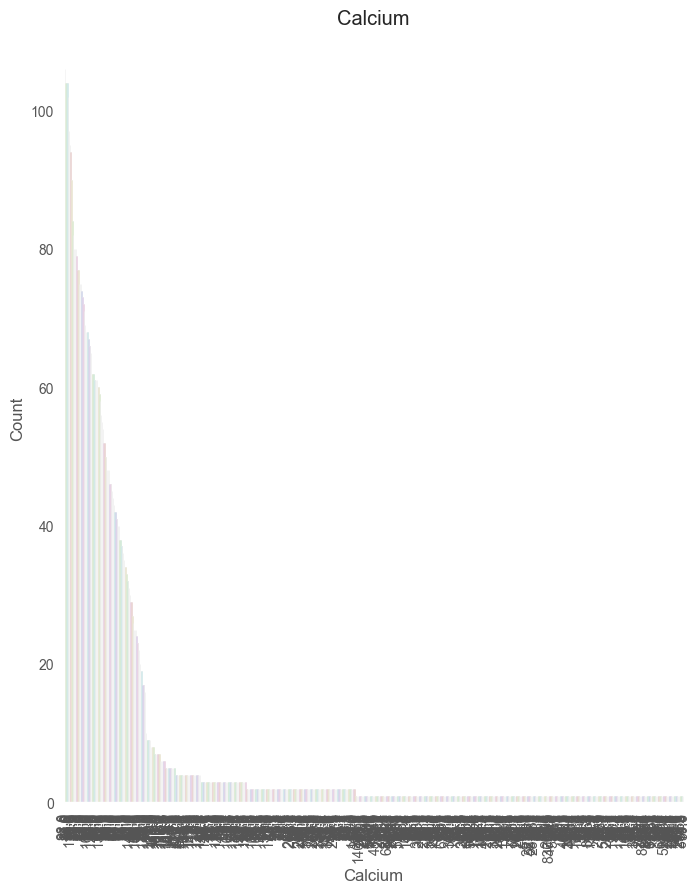

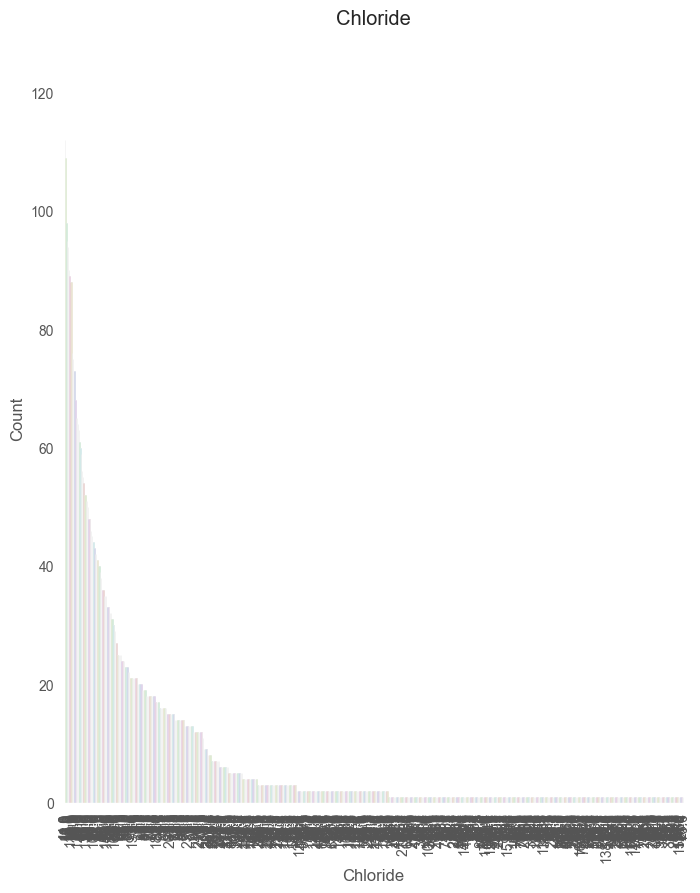

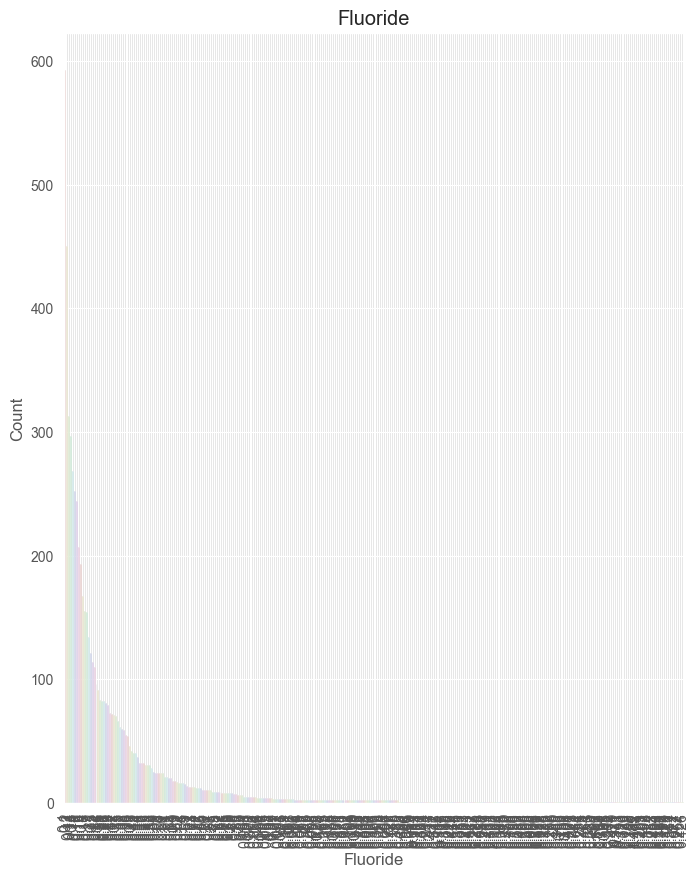

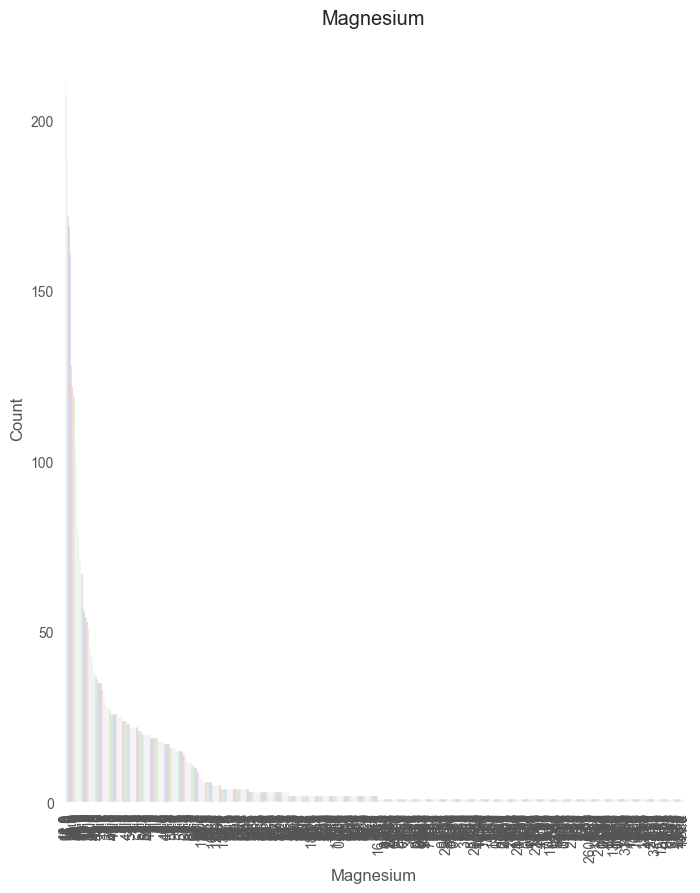

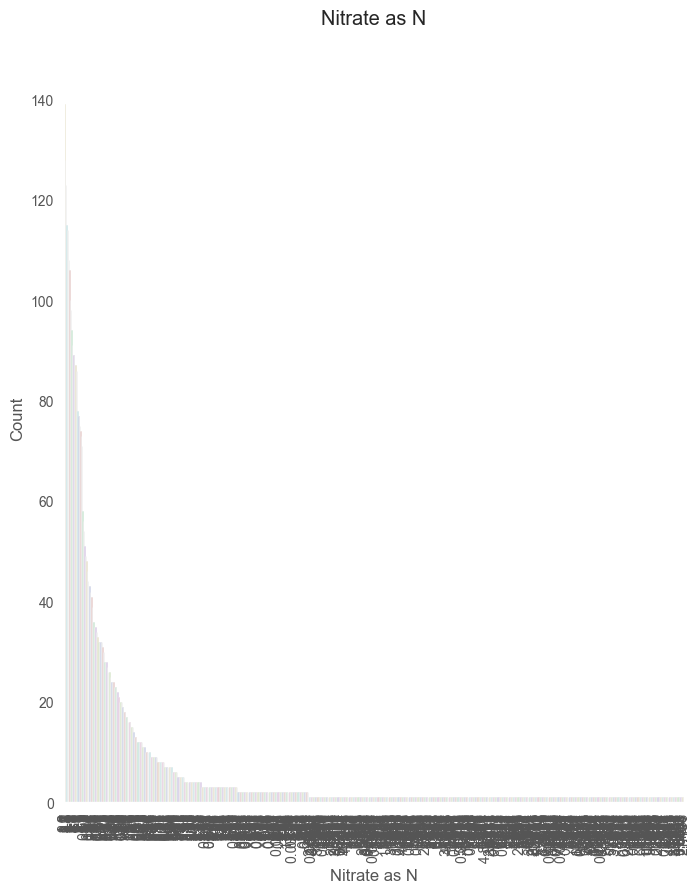

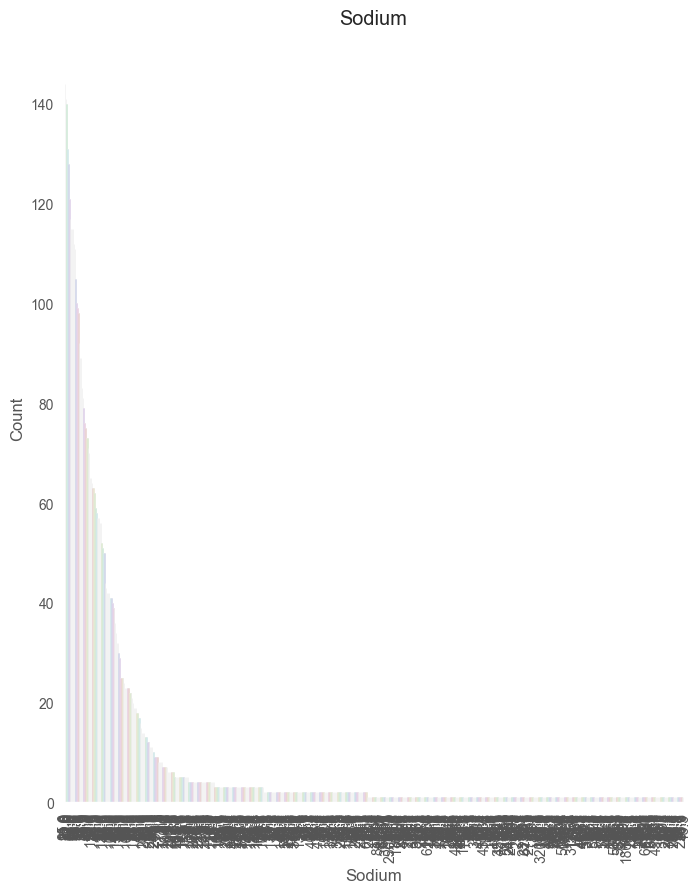

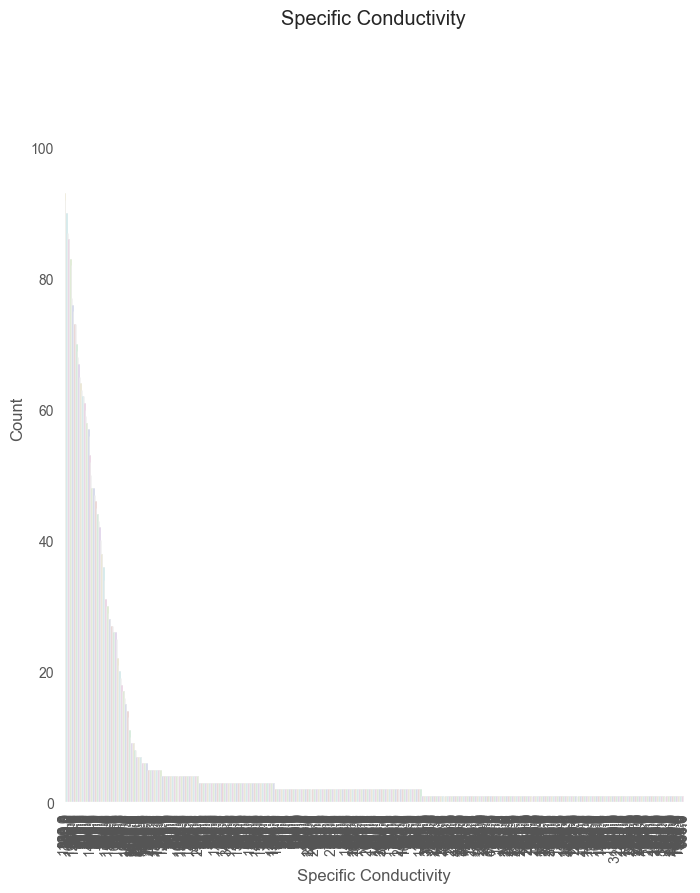

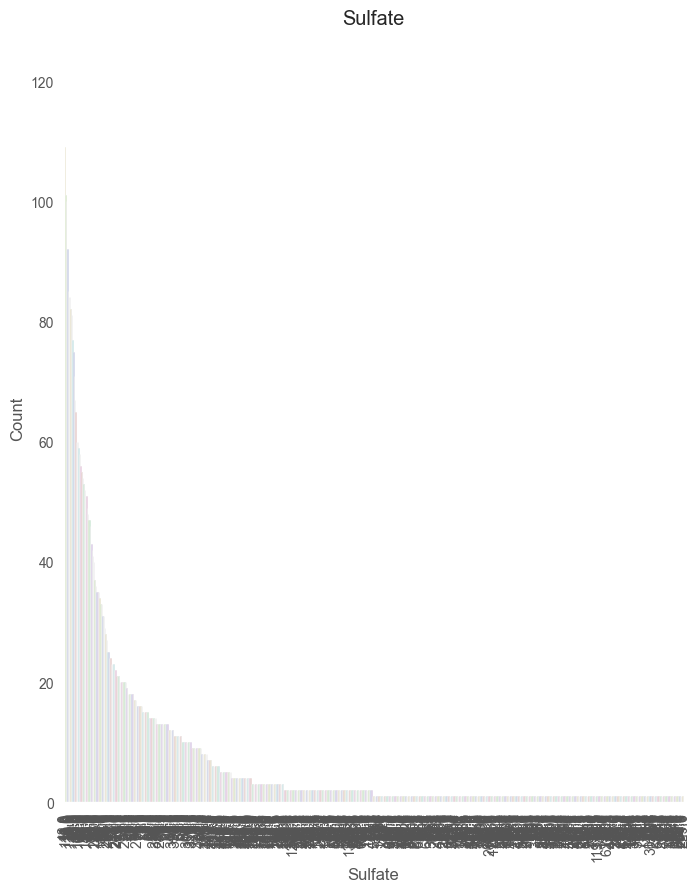

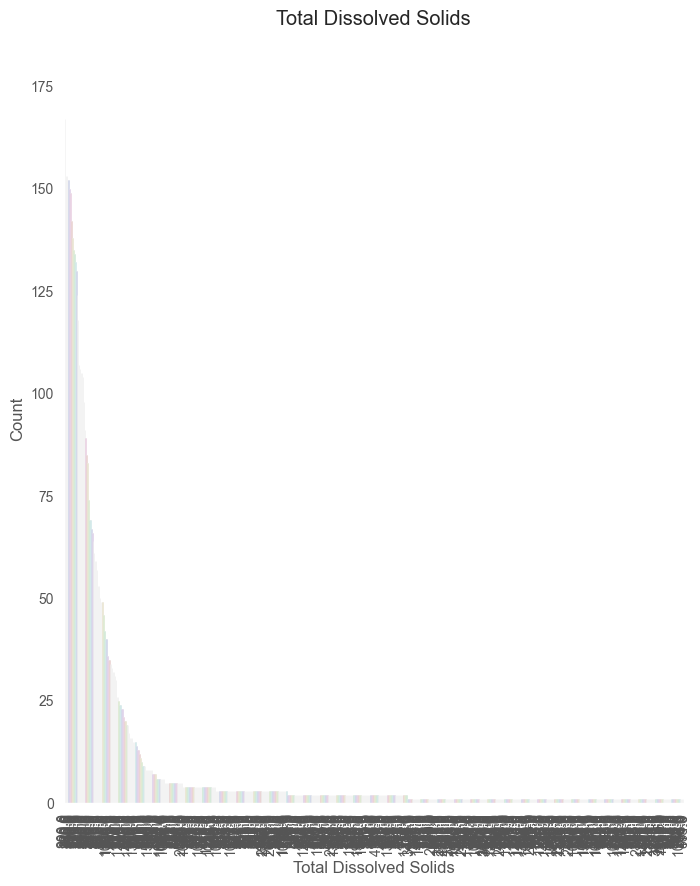

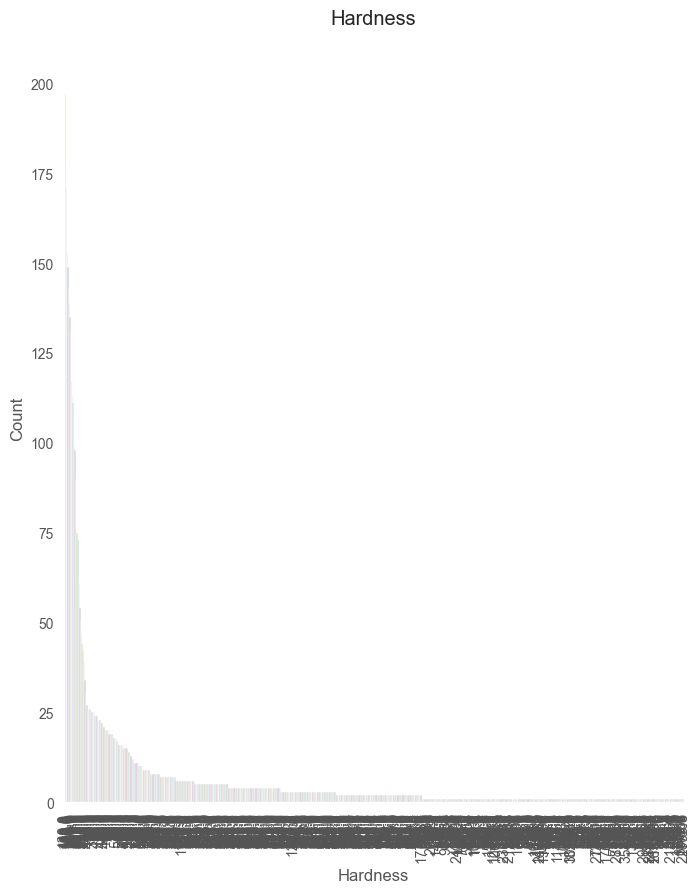

In [13]:
plt.style.use('ggplot')
bar_colors = sns.color_palette("hls", 8)

for kolom in col:
    plt.figure(figsize=(8, 10))
    counts = dTrain[kolom].value_counts()
    counts.plot(kind='bar', color=bar_colors)
    plt.xlabel(kolom)
    plt.ylabel("Count")
    plt.title(kolom)


In [14]:
X = dTrain.drop(columns=['Hardness'])
y = dTrain['Hardness']

In [15]:
X_train, X_val, y_train, y_val = tts(X, y,test_size=0.3, random_state=0)

## Linear reg

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_val_pred = lr.predict(X_val)

In [26]:
val_r2 = r2_score(y_val, y_val_pred)

In [27]:
print("Akurasi tes kedua yg val: ", val_r2)

Akurasi tes kedua yg val:  0.7561635077582115


In [28]:
# tes yang train cek overfit
y_train_pred = lr.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print("Akurasi tes kedua yg train: ", train_r2)

Akurasi tes kedua yg train:  0.7779828645767042


In [29]:
# load test.csv for linreg
X_test = dTest
test_pred = lr.predict(X_test)

In [91]:
submission2 = pd.DataFrame({
    'id' : dTest['id'],
    'Hardness' : test_pred
}
)

In [92]:
submission2.to_csv('submission2.csv', index=False)
print("submit csv kedua: submission2")

submit csv kedua: submission2


In [ ]:
train_r2 = r2_score(y_train, lr.predict(X_train))
print(f'Training R² score: {train_r2}')
if train_r2 > val_r2:
    print("The model may be overfitting. The training score is higher than the validation score.")
else:
    print("The model does not appear to be overfitting.")

## LASSO

In [108]:
#try with lasso reg
las = Lasso()
las.fit(X_train, y_train)
y_val_pred_las = las.predict(X_val)
val_las_r2 = r2_score(y_val, y_val_pred_las)

In [109]:
print("Akurasi tes kedua yg val lasso: ", val_las_r2)

Akurasi tes kedua yg val lasso:  0.7541047594638314


In [110]:
# tes yang train cek overfit lasso
y_train_pred_las = las.predict(X_train)
train_r2_las = r2_score(y_train, y_train_pred_las)
print("Akurasi tes kedua yg train: ", train_r2_las)

Akurasi tes kedua yg train:  0.7777555325791534


In [112]:
# load test.csv for lasreg
test_pred_las = las.predict(X_test)

In [114]:
submission2las = pd.DataFrame({
    'id' : dTest['id'],
    'Hardness' : test_pred_las
}
)

In [115]:
submission2las.to_csv('submission2lasso.csv', index=False)
print("submit csv kedua: submission2lasso")

submit csv kedua: submission2lasso


## RIDGE

In [117]:
# try with ridge reg
rid = Ridge()
rid.fit(X_train, y_train)
y_val_pred_rid = rid.predict(X_val)
val_rid_r2 = r2_score(y_val, y_val_pred_rid)

In [118]:
print("Akurasi tes kedua yg val ridge: ", val_rid_r2)

Akurasi tes kedua yg val ridge:  0.7561533377427485


In [119]:
# check the train ia it overfit with ridge?
y_train_pred_rid = rid.predict(X_train)
train_r2_rid = r2_score(y_train, y_train_pred_rid)
print("Akurasi tes kedua yg train ridge: ", train_r2_rid)

Akurasi tes kedua yg train ridge:  0.7779828487780354


In [120]:
# load test.csv for lridge
test_pred_rid = rid.predict(X_test)

In [121]:
submission2rid = pd.DataFrame({
    'id' : dTest['id'],
    'Hardness' : test_pred_rid
}
)

In [123]:
submission2rid.to_csv('submission2ridge.csv', index=False)
print("submit csv kedua: submission2ridge")

submit csv kedua: submission2ridge


## Try with DT regressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

In [129]:
#predict val set
y_val_pred_dtr = dtr.predict(X_val)
val_dtr_r2 = r2_score(y_val, y_val_pred_dtr)
print("Akurasi dtr kedua yg val dtr: ", val_dtr_r2)

Akurasi dtr kedua yg val dtr:  0.8869067871966169


In [130]:
#check training set
y_train_pred_dtr = dtr.predict(X_train)
train_r2_dtr = r2_score(y_train, y_train_pred_dtr)
print("Akurasi dtr yg train dtr: ", train_r2_dtr)

Akurasi dtr yg train dtr:  1.0


In [131]:
test_pred_dtr = dtr.predict(X_test)

In [132]:
submission2dtr = pd.DataFrame({
    'id' : dTest['id'],
    'Hardness' : test_pred_dtr
})

In [133]:
submission2dtr.to_csv('submission2dtr.csv', index=False)
print("submit csv kedua using dtr: submission2dtr")

submit csv kedua using dtr: submission2dtr


## Try RFR

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

In [18]:
#pred val set
y_val_pred_rf = rfr.predict(X_val)
val_rf_r2 = r2_score(y_val, y_val_pred_rf)
print("Akurasi rf kedua yg val rf: ", val_rf_r2)

Akurasi rf kedua yg val rf:  0.9275756186644512


In [19]:
#pred train set
y_train_pred_rf = rfr.predict(X_train)
train_rf_r2 = r2_score(y_train, y_train_pred_rf)
print("Akurasi rf yg train rf: ", train_rf_r2)

Akurasi rf yg train rf:  0.9859230608380406


In [30]:
test_pred_rf = rfr.predict(X_test)

In [31]:
submission2rf = pd.DataFrame({
    'id' : dTest['id'],
    'Hardness' : test_pred_rf
})

In [32]:
submission2rf.to_csv('submission2rf.csv', index=False)
print("submit csv using rf: submission2rf")

submit csv using rf: submission2rf


## SVR

In [33]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [34]:
y_val_pred_svr = svr.predict(X_val)
val_rsv_r2 = r2_score(y_val, y_val_pred_svr)
print("Akurasi svr yg val : ", val_rsv_r2)

Akurasi svr yg val :  0.36229330401213045


In [35]:
y_train_pred_svr = svr.predict(X_train)
train_rsv_r2 = r2_score(y_train, y_train_pred_svr)
print("Akurasi svr yg train : ", train_rsv_r2)

Akurasi svr yg train :  0.38084130007403283


## Gradient Boosting Regressor

In [37]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [38]:
y_val_pred_gbr = gbr.predict(X_val)
val_gbr_r2 = r2_score(y_val, y_val_pred_gbr)
print("Akurasi gbr yg val : ", val_gbr_r2)

Akurasi gbr yg val :  0.9318667503033805


In [39]:
y_train_pred_gbr = gbr.predict(X_train)
train_gbr_r2 = r2_score(y_train, y_train_pred_gbr)
print("Akurasi gbr yg train : ", train_gbr_r2)

Akurasi gbr yg train :  0.9458817248802511


In [40]:
test_pred_gbr = gbr.predict(X_test)

In [41]:
submission2gbr = pd.DataFrame({
    'id' : dTest['id'],
    'Hardness' : test_pred_gbr
})

In [42]:
submission2gbr.to_csv('submission2gbr.csv', index=False)
print("submit csv using gbr: submission2gbr")

submit csv using gbr: submission2gbr
